In [3]:
import pandas as pd
import numpy as np

In [8]:
###Loading the data frame
df=pd.read_csv("c:/Users/sakri18/Downloads/h1b_kaggle.csv")

In [78]:
df.head(5) ##Validating the data frame


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [11]:
##Importing other required Packages
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from subprocess import check_output
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [26]:
##Cleaning the data;
df_clean1=df[(df['PREVAILING_WAGE']<600000)&(df['CASE_STATUS']=='CERTIFIED')]
df_clean2=df_clean1.dropna(axis=0,how='all')


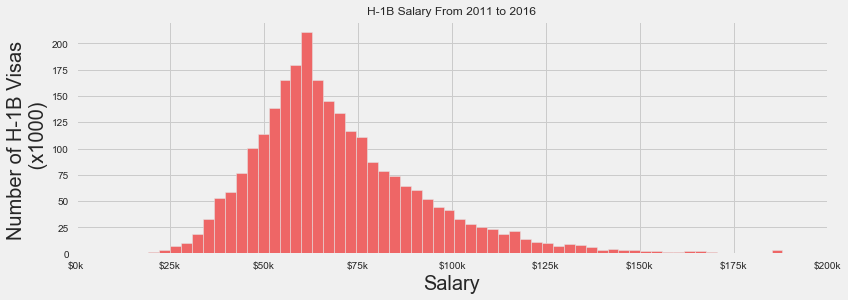

In [30]:
##Total H1-B Wage Distribution ---> (Period 2011-2016)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.hist(df_clean2['PREVAILING_WAGE'],bins=200, edgecolor='#E6E6E6', color='#EE6666');
plt.xlim([0, 200000])


def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatterUSD = FuncFormatter(thousandUSD)
formatter = FuncFormatter(thousand)
###X and Y Axis Paramaters
plt.xlabel('Salary',size=20)
plt.ylabel('Number of H-1B Visas \n (x1000)', size=20)
ax.xaxis.set_major_formatter(formatterUSD)
ax.yaxis.set_major_formatter(formatter)
ax.set_title('H-1B Salary From 2011 to 2016')
##We are using the FuncFormatter function as part of the Matplotlib library to scale both of our x axis and y axis around $62.5k
##We are scaling our x-axis to base salary limit of [200000]
##Also, In the histogram the data frame 'Prevailing Wage' denoting the 'salary' parameter has been used on which Histogram has been generated.


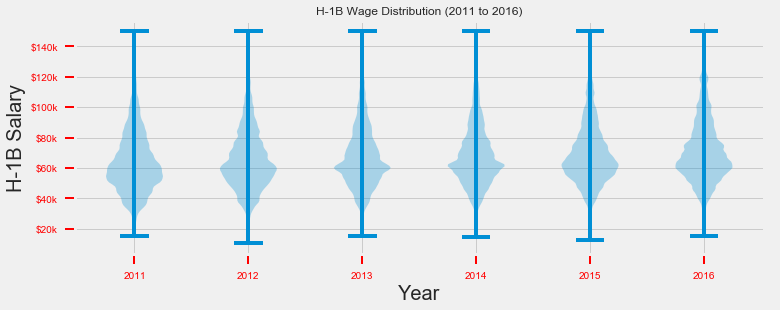

In [38]:
##H1-B Wage Distribution per Year
##Preparing the DataSet for ViolinPlot; 
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(11, 4))
    df_temp = df_clean2[df_clean2['PREVAILING_WAGE']<150000]
    ax.violinplot(dataset = [df_temp[df_temp.YEAR == 2011]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2012]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2013]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2014]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2015]['PREVAILING_WAGE'],
                          df_temp[df_temp.YEAR == 2016]['PREVAILING_WAGE']])
def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
formatterUSD = FuncFormatter(thousandUSD) ###Formatting the Y-axis in Thousands Scale;

plt.xlabel('Year',size=20)
plt.ylabel('H-1B Salary', size=20)
ax.yaxis.set_major_formatter(formatterUSD)
ax.tick_params(direction='out', length=10, width=2, colors='r') ##This will make all Ticks to be 'red', pointing 'out' of the box,
#and with dimensions 10 points by 2 points; Tick lines will be 'red'
ax.set_xticklabels(range(2010,2017))
plt.title('H-1B Wage Distribution (2011 to 2016)')
###Setting the Title for the Plot

In [77]:
##Distribution of H1-B Employers
employer_name=df_clean2['EMPLOYER_NAME'].value_counts().index.tolist()
 ###Getting the Employer_Name in a list


In [75]:
employer_petitions=df_clean2['EMPLOYER_NAME'].value_counts().tolist()

In [51]:
df_employer=df_clean2['EMPLOYER_NAME'].value_counts().to_frame().head(50)
df_employer
df_employer=df_employer.reset_index()
df_employer.columns=['EMPLOYER_NAME','H1B_COUNT']
df_employer.columns

Index(['EMPLOYER_NAME', 'H1B_COUNT'], dtype='object')

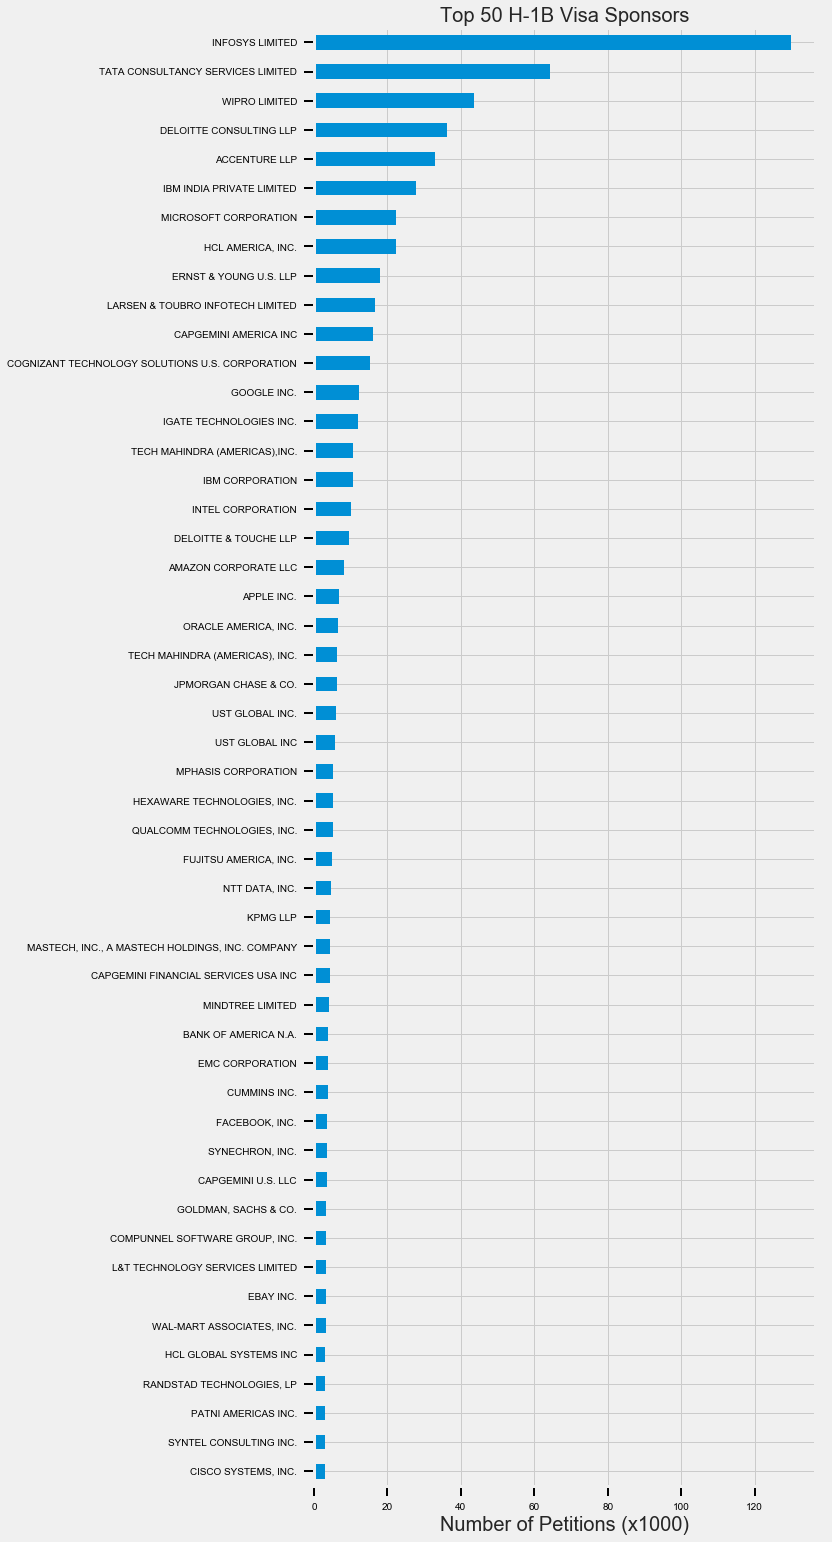

In [60]:
fig, ax = plt.subplots()# figsize=(8,4))
s = df_employer.set_index('EMPLOYER_NAME')['H1B_COUNT']
plt.style.use('fivethirtyeight')
ax = s.plot(kind='barh', figsize=(8, 25), 
            title='Top 50 H-1B Visa Sponsors')
ax.set_ylabel('', visible=False)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.invert_yaxis()
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatter = FuncFormatter(thousand)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Number of Petitions (x1000)',size=20)

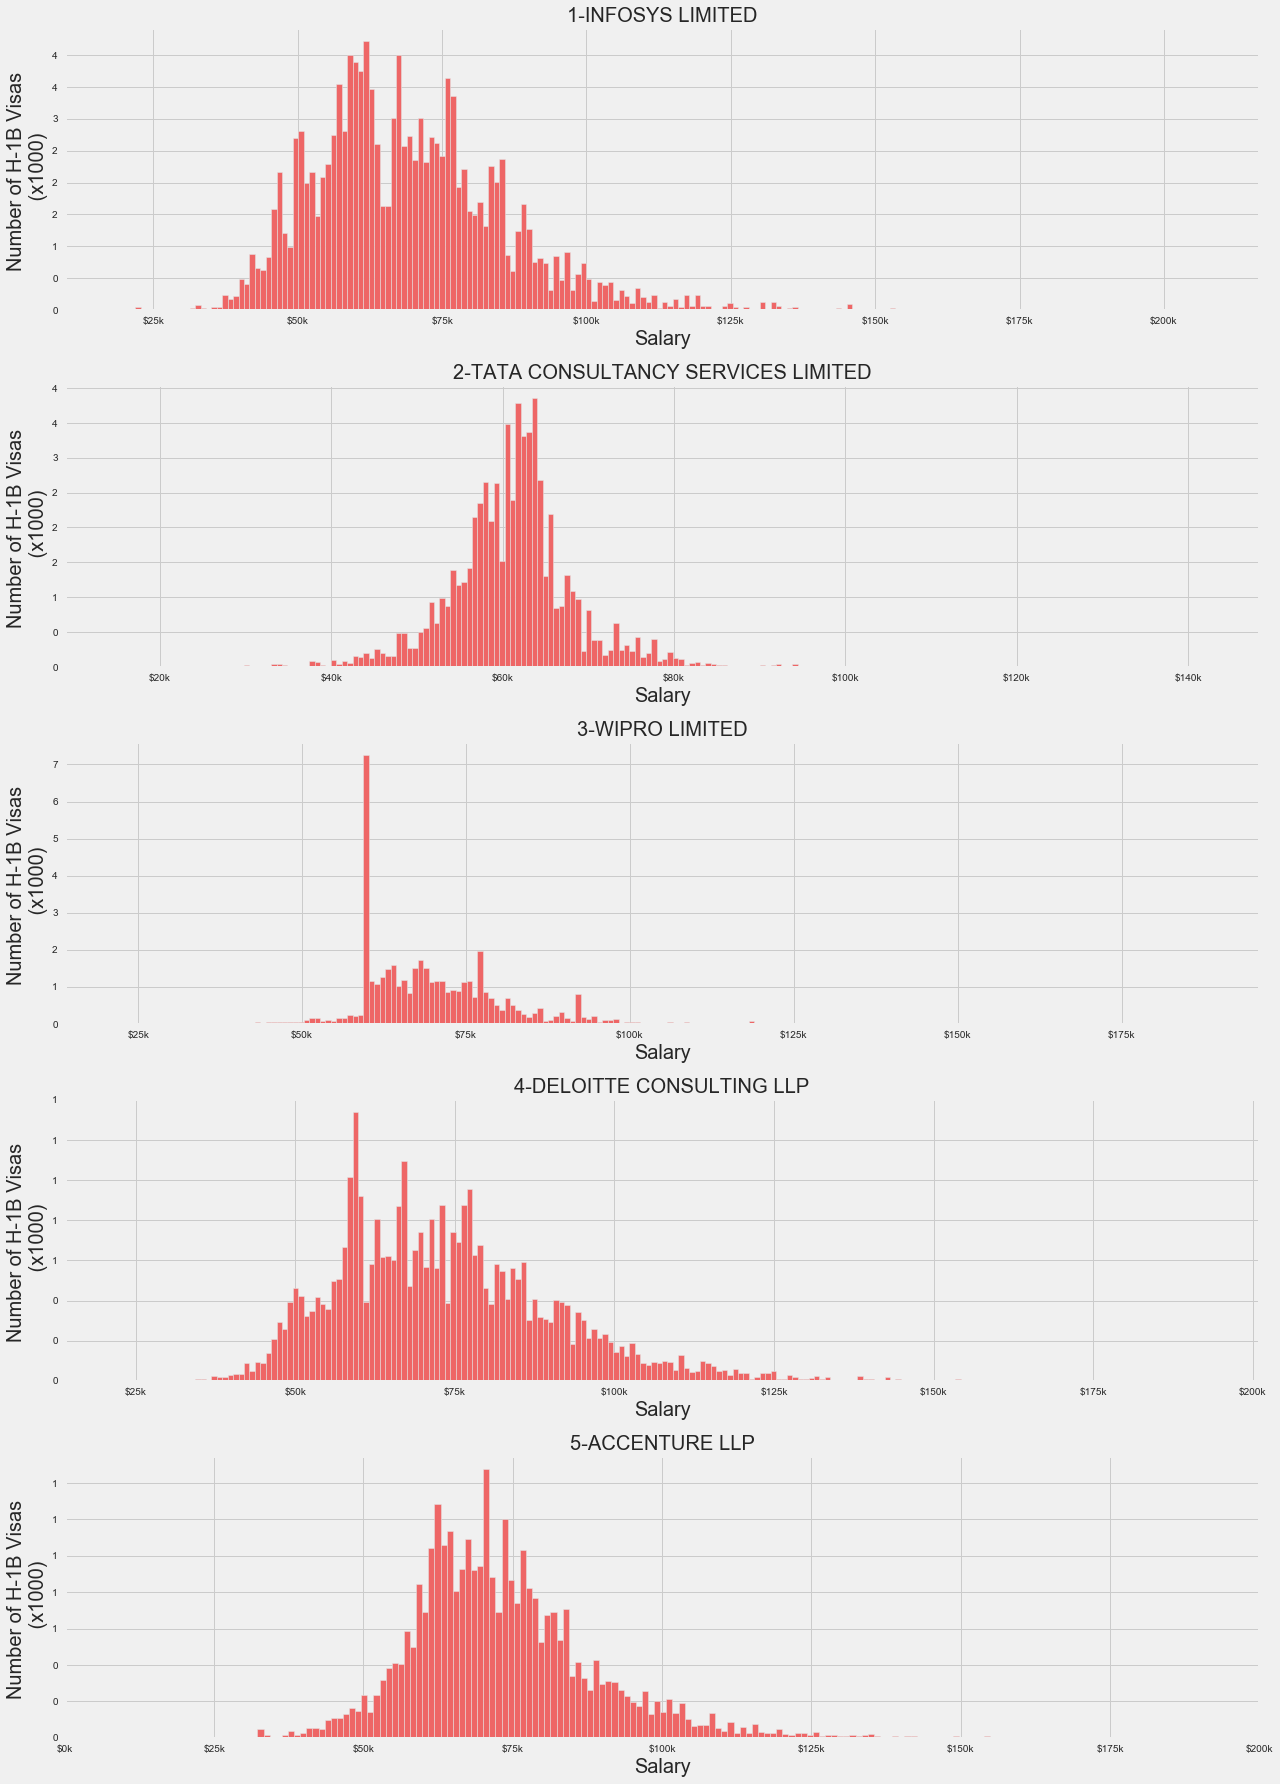

In [64]:
#df.info();
employer_name[0];

####Using the FunctionFormatter to scale our x and y axis;
def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatterUSD = FuncFormatter(thousandUSD)
formatter = FuncFormatter(thousand)

##Histogram on the Salary Distribution of various companies;

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(5, 1, figsize=(18, 25))
    for i in range(0,5):
        ax[i].hist(df_clean2[df_clean2['EMPLOYER_NAME']==employer_name[i]]['PREVAILING_WAGE'],
          bins=200, edgecolor='#E6E6E6', color='#EE6666');
        ax[i].set_title('%d-%s'%(i+1, employer_name[i]))
        ax[i].set_xlabel('Salary',size=20)
        ax[i].set_ylabel('Number of H-1B Visas \n (x1000)', size=20)
        ax[i].xaxis.set_major_formatter(formatterUSD)
        ax[i].yaxis.set_major_formatter(formatter)

plt.xlim([0, 200000])
fig.tight_layout()

In [73]:
df_top20_worksite = df.groupby(['WORKSITE'], sort=False).size().nlargest(20).reset_index(name='top20')
df_top20_worksite

,WORKSITE,top20
0,"NEW YORK, NEW YORK",191719
1,"HOUSTON, TEXAS",83889
2,"SAN FRANCISCO, CALIFORNIA",62787
3,"ATLANTA, GEORGIA",52193
4,"CHICAGO, ILLINOIS",51497
5,"SAN JOSE, CALIFORNIA",50083
6,"SUNNYVALE, CALIFORNIA",35136
7,"DALLAS, TEXAS",31628
8,"BOSTON, MASSACHUSETTS",31471
9,"REDMOND, WASHINGTON",30667


In [71]:
df_temp = df_top20_worksite
for worksite in df_top20_worksite['WORKSITE']:
    if i==0: df_temp = df_clean2[df_clean2['WORKSITE']==worksite]
    if i>0: df_temp = pd.concat([df_temp,df_clean2[df_clean2['WORKSITE']==worksite]]) ###'Appending to the Pandas Dataframe' all the top '20' worksite
    i+=1

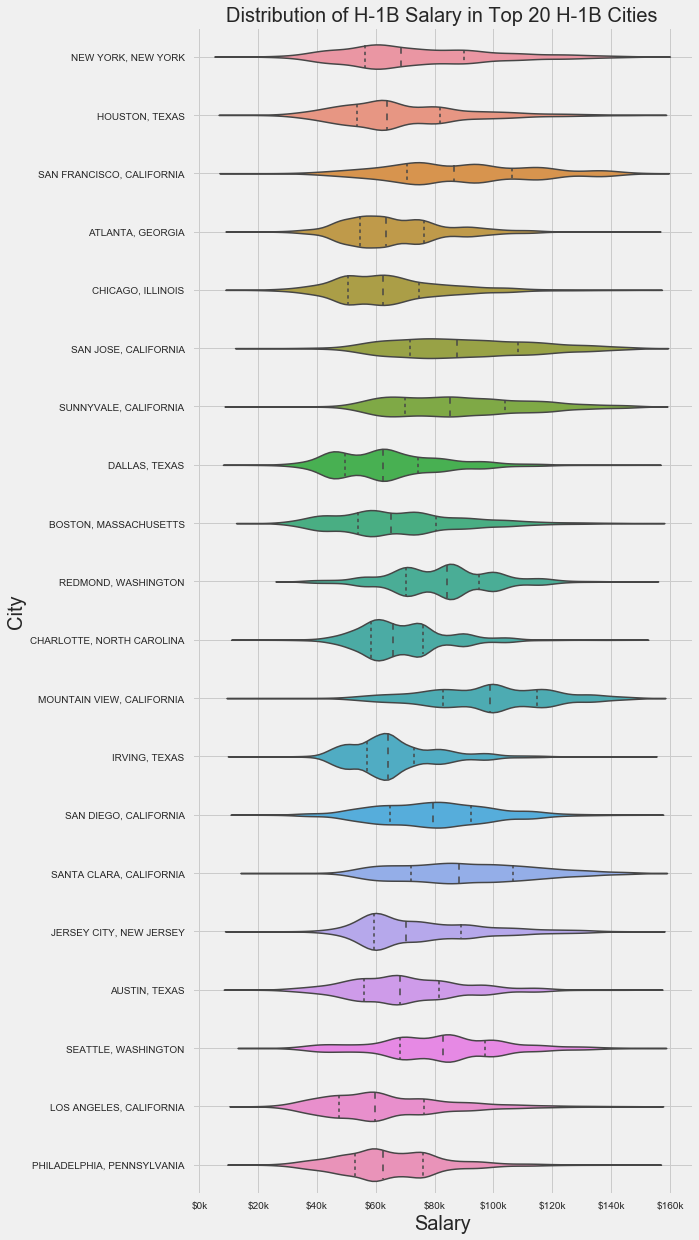

In [72]:
###Visualizing the WorkSite against Prevailing Wage using Seaborn Visualizations
import seaborn as sns
df_temp = df_temp[df_temp['PREVAILING_WAGE']<150000]
fig, ax = plt.subplots(figsize=(8,20))
ax = sns.violinplot(y='WORKSITE',x='PREVAILING_WAGE', data=df_temp,dodge=True,inner="quartile",bw=.2, linewidth=1.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def thousandUSD(x, pos):
    return '$%1.0fk' % (x*1e-3)

formatterUSD = FuncFormatter(thousandUSD)
ax.xaxis.set_major_formatter(formatterUSD)
ax.set_title('Distribution of H-1B Salary in Top 20 H-1B Cities', fontsize=20)
ax.grid(True)
plt.xlabel('Salary',size=20)
plt.ylabel('City',size=20)

In [74]:
df_temp

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,JOB_TITLE,PREVAILING_WAGE,SOC_NAME,Unnamed: 0,WORKSITE,YEAR,lat,lon,top20
44,CERTIFIED,MAVENCARE US INC.,Y,SVP BUSINESS OPERATIONS AND DEVELOPMENT,122179.0,CHIEF EXECUTIVES,45.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
137,CERTIFIED,TMS PLUMBING AND HEATING CORP,Y,OPERATIONS DIRECTOR,74276.8,CHIEF EXECUTIVES,138.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
139,CERTIFIED,LIGHT & STAR USA INC,N,CHIEF FINANACIAL OFFICER,70000.0,CHIEF EXECUTIVES,140.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
631,CERTIFIED,MANSUR GAVRIEL LLC,Y,LOGISTICS & OPERATIONS MANAGER,74402.0,GENERAL AND OPERATIONS MANAGERS,632.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
651,CERTIFIED,ADOBE SYSTEMS INCORPORATED,Y,PRODUCT MARKETING MANAGER,117437.0,GENERAL AND OPERATIONS MANAGERS,652.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
652,CERTIFIED,VIACOM INTERNATIONAL INC.,Y,OPERATIONS MANAGER,74402.0,GENERAL AND OPERATIONS MANAGERS,653.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
653,CERTIFIED,ADOBE SYSTEMS INCORPORATED,Y,PRODUCT MANAGER,117437.0,GENERAL AND OPERATIONS MANAGERS,654.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
655,CERTIFIED,21ST CENTURY FOX AMERICA INC.,Y,BUSINESS MANAGER - MEDIA & ARTS,117437.0,GENERAL AND OPERATIONS MANAGERS,656.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
669,CERTIFIED,BETH ISRAEL MEDICAL CENTER,Y,MANAGER OPERATIONS & BUSINESS DEVELOPMENT,74402.0,GENERAL AND OPERATIONS MANAGERS,670.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
689,CERTIFIED,GEMOLOGICAL INSTITUTE OF AMERICA (GIA),N,"ASSOCIATE MANAGER, OPERATIONS SERVICES",58261.0,GENERAL AND OPERATIONS MANAGERS,690.0,"NEW YORK, NEW YORK",2016.0,40.712784,-74.005941,NaN
